(150, 4) (150,) ['setosa' 'versicolor' 'virginica']
Test accuracy : 0.8889
Training time : 0.1574 s
Testing/prediction time : 0.0058 s
Confusion Matrix (DataFrame):
            setosa  versicolor  virginica
setosa          15           0          0
versicolor       0          14          1
virginica        0           4         11


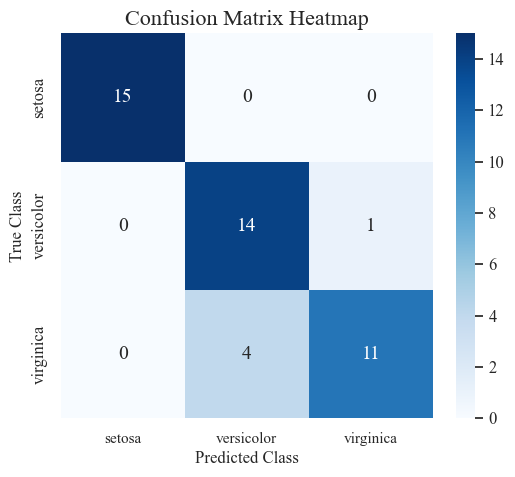

Classification Report (DataFrame); 


,precision,recall,f1-score,support
setosa,1.000000,1.000000,1.000000,15.000000
versicolor,0.777778,0.933333,0.848485,15.000000
virginica,0.916667,0.733333,0.814815,15.000000
accuracy,0.888889,0.888889,0.888889,0.888889
macro avg,0.898148,0.888889,0.887767,45.000000
weighted avg,0.898148,0.888889,0.887767,45.000000


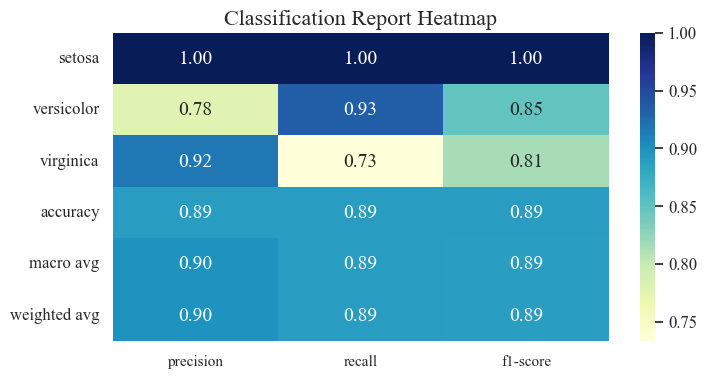

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import time 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split, StratifiedGroupKFold, cross_val_score 
from sklearn.preprocessing import StandardScaler, label_binarize 
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix, 
    classification_report,  
    roc_auc_score,  
    roc_curve,  
    auc 
)
from sklearn.ensemble import RandomForestClassifier  

sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "font.family": "Times New Roman",
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12
}) 

iris = load_iris()
X, y = iris.data, iris.target 
class_names = iris.target_names 
n_classes = len(class_names) 

print(X.shape, y.shape, class_names)

# Standardize features
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Define model
model = RandomForestClassifier(random_state=42)

# Train time
start_train = time.time() 
model.fit(X_train, y_train) 
train_time = time.time() - start_train 

# Predict time
start_pred = time.time() 
y_pred = model.predict(X_test) 
testing_time = time.time() - start_pred 

# Accuracy
acc = accuracy_score(y_test, y_pred) 
print(f"Test accuracy : {acc:.4f}") 
print(f"Training time : {train_time:.4f} s")
print(f"Testing/prediction time : {testing_time:.4f} s")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

print("Confusion Matrix (DataFrame):")
print(cm_df)

plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show() 

report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True) 
report_df = pd.DataFrame(report_dict).transpose() 
print("Classification Report (DataFrame); ") 
display(report_df) 

report_heatmap = report_df.drop(columns=["support"])
plt.figure(figsize=(8, 4))
sns.heatmap(report_heatmap, annot= True, fmt = ".2f", cmap = "YlGnBu")

plt.title("Classification Report Heatmap")

plt.show()


ROC-AUC Score (One vs Rest): 0.9893


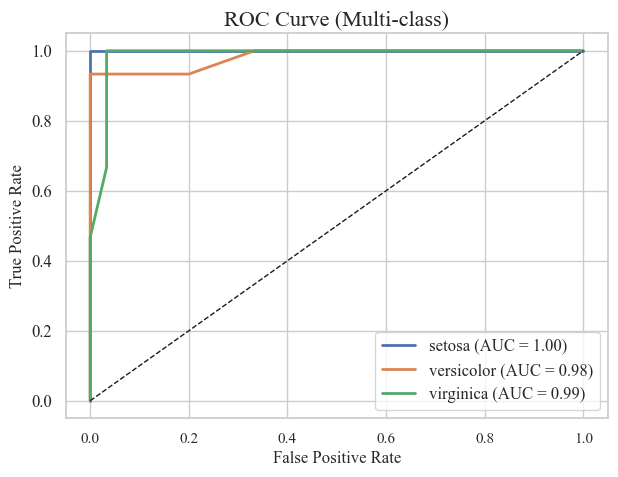

In [33]:
if hasattr(model, "predict_proba"): 
    y_test_bin = label_binarize(y_test, classes=range(n_classes)) 
    y_score = model.predict_proba(X_test)

    roc_auc = roc_auc_score(y_test_bin, y_score, multi_class="ovr") 
    print(f"ROC-AUC Score (One vs Rest): {roc_auc:.4f}")

    plt.figure(figsize=(7, 5))

    for i in range(n_classes): 
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        plt.plot(fpr, tpr, lw=2, label=f"{class_names[i]} (AUC = {auc(fpr, tpr):.2f})")

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.title("ROC Curve (Multi-class)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()


In [35]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_score = cross_val_score(model, X_scaled, y, cv=kfold, scoring="accuracy")

print("\nCross-validation scores:", cv_score)
print(f"5-Fold Cross-Validation Accuracy: {cv_score.mean():.4f} ± {cv_score.std():.4f}")


Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.96666667 0.9       ]
5-Fold Cross-Validation Accuracy: 0.9467 ± 0.0267
